In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Politics

## Russian elections
**It's often said that Russian elections are rigged so I will use Benford's law to find out if we can see some irregularities in votes.**

In [21]:
russian_data = pd.read_csv("data/russian_elections.csv")
usa_data = pd.read_csv("data/usa_elections.csv", sep=";")

In [22]:
russian_data.head()

,ps_id,region_name,subregion_name,Baburin Sergei Nikolaevich,Grudinin Pavel Nikolaevich,Zhirinovskiy Vladimir Volfovich,Putin Vladimir Vladimirovich,Sobchak Ksenia Anatolyevna,Suraikin Maksim Aleksandrovich,Titov Boris Yurievich,...,Number of voters enlisted,Number of ballot papers in portable ballot boxes,Number of ballot papers given inside the polling station,Number of ballot papers given outside the polling station,Number of ballot papers given for advance voting,Number of excessive ballot papers,Number of ballot papers acquired at the polling station,Number of invalid ballot papers,Number of unused ballot papers,Number of lost ballot papers
0,713,Altajskij kraj,Bystroistokskaa,1,109,42,398,2,3,0,...,815,139,421,139,0,0,750,5,190,0
1,714,Altajskij kraj,Bystroistokskaa,4,27,27,199,0,3,0,...,355,38,224,38,0,0,350,2,88,0
2,715,Altajskij kraj,Bystroistokskaa,3,100,47,325,2,1,2,...,812,63,424,63,0,0,750,6,263,0
3,716,Altajskij kraj,Bystroistokskaa,2,131,51,420,1,5,1,...,960,56,568,56,0,0,900,7,276,0
4,717,Altajskij kraj,Bystroistokskaa,6,155,66,406,5,2,2,...,1034,65,586,65,0,0,1000,8,349,0


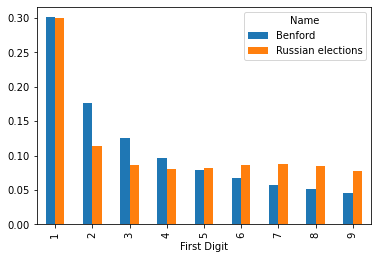

In [23]:
russian_digits = russian_data["Putin Vladimir Vladimirovich"].dropna().astype(str).str[0].value_counts(normalize=True)
russian_digits = russian_digits.drop(russian_digits.index[9], axis=0) 
russian_digits = pd.DataFrame({"First Digit": russian_digits.index, "Proportion": russian_digits.values, "Name":"Russian elections"})
benford_nums = pd.DataFrame({"First Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'], "Proportion": [.301, .176, .125, .097, .079, .067, .058, .051, .046], "Name":"Benford"})
data_russian = pd.concat([benford_nums, russian_digits]).pivot("First Digit",  "Name", "Proportion")
data_russian.plot(kind="bar")
plt.savefig("images/russian.png")

## American elections 



In [24]:
usa_data.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Vermont,VT,Sutton,95000197.0,Republican,John Kasich,20,0.227
1,Vermont,VT,Tunbridge,95000204.0,Republican,John Kasich,36,0.319
2,Vermont,VT,Weathersfield,95000220.0,Republican,Ted Cruz,46,0.111
3,Vermont,VT,Weston,95000228.0,Republican,John Kasich,32,0.471
4,Vermont,VT,Whiting,95000233.0,Republican,Ben Carson,0,0.000


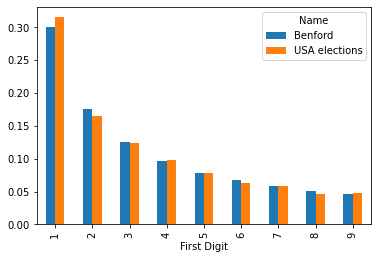

In [25]:
Trump_data = usa_data[ usa_data.candidate == "Donald Trump"]
usa_digits = Trump_data.votes.dropna().astype(str).str[0].value_counts(normalize=True)
usa_digits = usa_digits.drop(usa_digits.index[9], axis=0) 
usa_digits = pd.DataFrame({"First Digit": usa_digits.index, "Proportion": usa_digits.values, "Name":"USA elections"})
benford_nums = pd.DataFrame({"First Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'], "Proportion": [.301, .176, .125, .097, .079, .067, .058, .051, .046], "Name":"Benford"})
data_usa = pd.concat([benford_nums,usa_digits]).pivot("First Digit",  "Name", "Proportion")
data_usa.plot(kind="bar")
plt.savefig("images/usa.png")

# Sports

## NBA Players Stats

In [26]:
nba_data = pd.read_csv("data/players_stats.csv")
nba_data.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


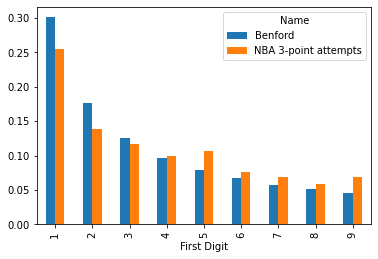

In [27]:
nba_digits = nba_data["PTS"].astype(str).str[0].value_counts(normalize = True)
nba_digits = nba_digits.drop(nba_digits.index[9], axis=0) 
nba_digits = pd.DataFrame({"First Digit": nba_digits.index, "Proportion": nba_digits.values, "Name":"NBA 3-point attempts"})
benford_nums = pd.DataFrame({"First Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'], "Proportion": [.301, .176, .125, .097, .079, .067, .058, .051, .046], "Name":"Benford"})
data_nba = pd.concat([benford_nums,nba_digits]).pivot("First Digit",  "Name", "Proportion")
data_nba.plot(kind="bar")
plt.savefig("images/nba.png")

# Economics

## S&P500 Volume

In [28]:
stock_data = pd.read_csv("data/S&P500.csv")
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


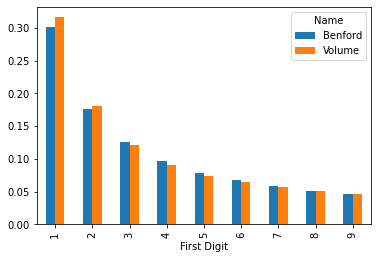

In [29]:
stock_digits = stock_data["volume"].dropna().astype(str).str[0].value_counts(normalize=True)
stock_digits = stock_digits.drop(stock_digits.index[9], axis=0)
stock_digits = pd.DataFrame({"First Digit": stock_digits.index, "Proportion": stock_digits.values, "Name":"Volume"})
benford_nums = pd.DataFrame({"First Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'], "Proportion": [.301, .176, .125, .097, .079, .067, .058, .051, .046], "Name":"Benford"})
data_stocks = pd.concat([benford_nums,stock_digits]).pivot("First Digit",  "Name", "Proportion")
data_stocks.plot(kind="bar")
plt.savefig("images/stocks.png")

## Agriculture prices

In [30]:
agri_data = pd.read_csv("data/agri_prices.csv")
agri_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


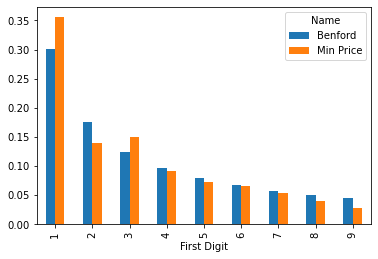

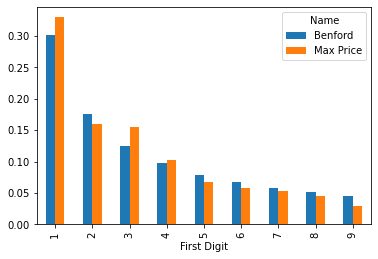

In [38]:
min_digits = agri_data["min_price"].dropna().astype(str).str[0].value_counts(normalize=True)
min_digits = min_digits.drop(min_digits.index[9], axis=0)
max_digits = agri_data["max_price"].dropna().astype(str).str[0].value_counts(normalize=True)
max_digits = max_digits.drop(max_digits.index[9], axis=0)

min_digits = pd.DataFrame({"First Digit": min_digits.index, "Proportion": min_digits.values, "Name":"Min Price"})
max_digits = pd.DataFrame({"First Digit": max_digits.index, "Proportion": max_digits.values, "Name":"Max Price"})

benford_nums = pd.DataFrame({"First Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'], "Proportion": [.301, .176, .125, .097, .079, .067, .058, .051, .046], "Name":"Benford"})


data_agri_min = pd.concat([benford_nums, min_digits]).pivot("First Digit",  "Name", "Proportion")
data_agri_min.plot(kind="bar")
plt.savefig("images/agriculture_min.png")
data_agri_max = pd.concat([benford_nums, max_digits]).pivot("First Digit",  "Name", "Proportion")
data_agri_max.plot(kind="bar")
plt.savefig("images/agriculture_max.png")